In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\anush\OneDrive\Desktop\customer_data.csv")
df.head()

,CustomerID,Gender,Age,SubscriptionType,MonthlyCharges,TenureMonths,TotalCharges,ContractType,PaymentMethod,Churn
0,C001,Female,23,Basic,299,3,879,Month-to-Month,UPI,Yes
1,C002,Male,35,Premium,799,24,19176,Yearly,Credit Card,No
2,C003,Female,29,Standard,499,8,3992,Month-to-Month,Debit Card,Yes
3,C004,Male,41,Premium,799,36,28764,Yearly,Credit Card,No
4,C005,Female,31,Basic,299,2,598,Month-to-Month,Cash,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        10 non-null     object
 1   Gender            10 non-null     object
 2   Age               10 non-null     int64 
 3   SubscriptionType  10 non-null     object
 4   MonthlyCharges    10 non-null     int64 
 5   TenureMonths      10 non-null     int64 
 6   TotalCharges      10 non-null     int64 
 7   ContractType      10 non-null     object
 8   PaymentMethod     10 non-null     object
 9   Churn             10 non-null     object
dtypes: int64(4), object(6)
memory usage: 932.0+ bytes


In [4]:
df.describe()

,Age,MonthlyCharges,TenureMonths,TotalCharges
count,10.000000,10.000000,10.000000,10.000000
mean,34.200000,559.000000,16.000000,11282.200000
std,9.425733,222.111083,15.811388,13177.003848
min,22.000000,299.000000,1.000000,299.000000
25%,27.500000,349.000000,3.750000,1657.250000
50%,33.000000,499.000000,11.000000,5890.000000
75%,40.500000,799.000000,22.500000,16627.500000
max,50.000000,799.000000,48.000000,38352.000000


In [5]:
# Churn Rate Analysis
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
Yes    50.0
No     50.0
Name: proportion, dtype: float64


In [6]:
# Churn by Contract Type
contract_churn = pd.crosstab(df['ContractType'], df['Churn'], normalize='index') * 100
print(contract_churn)

Churn              No    Yes
ContractType                
Month-to-Month    0.0  100.0
Quarterly       100.0    0.0
Yearly          100.0    0.0


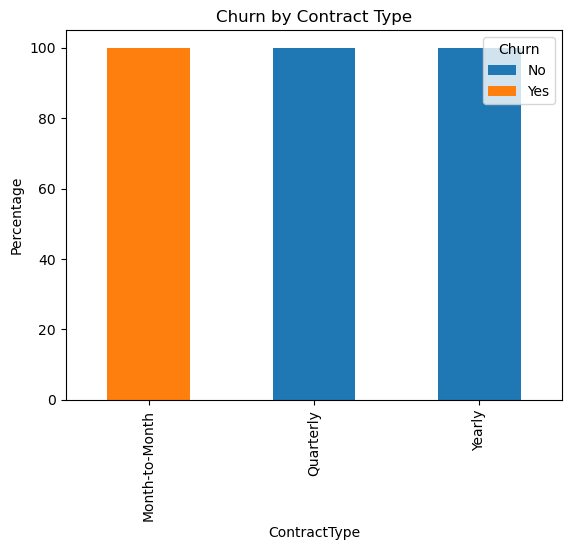

In [7]:
contract_churn.plot(kind='bar', stacked=True)
plt.title("Churn by Contract Type")
plt.ylabel("Percentage")
plt.show()

In [8]:
# Cohort Analysis
df['TenureGroup'] = pd.cut (df['TenureMonths'],bins=[0,3,6,12,24,60],labels=['0-3','4-6','7-12','13-24','25+'])

In [9]:
cohort = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100
cohort

Churn,No,Yes
TenureGroup,,
0-3,0.0,100.0
4-6,0.0,100.0
7-12,0.0,100.0
13-24,100.0,0.0
25+,100.0,0.0


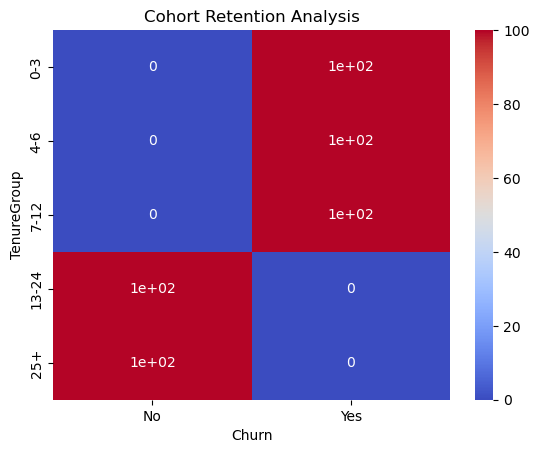

In [10]:
sns.heatmap(cohort, annot=True, cmap="coolwarm")
plt.title("Cohort Retention Analysis")
plt.show()

In [11]:
# Customer Lifetime Value (CLV) 
df['CLV'] = df['MonthlyCharges'] * df['TenureMonths']
df[['CustomerID','CLV']].head()

,CustomerID,CLV
0,C001,897
1,C002,19176
2,C003,3992
3,C004,28764
4,C005,598


In [12]:
df.groupby('SubscriptionType')['CLV'].mean()

SubscriptionType
 Standard     6986.0
Basic          598.0
Premium      22771.5
Standard      6487.0
Name: CLV, dtype: float64

In [13]:
# Churn Reason Indicators 
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True) * 100

PaymentMethod  Churn
Cash           Yes      100.000000
Credit Card    No       100.000000
Debit Card     Yes      100.000000
Net Bankin     No       100.000000
UPI            Yes       66.666667
               No        33.333333
Name: proportion, dtype: float64